### **Note** 
* All items of problems in problem sets should be done in seperate cells.
* Do not forget to include title, labels of each line and set axis names for every figure you plot.
* If most part of your plot is very close to $0$, it might be a good idea to use logarithmic scale.
* You can submit incomplete problems. They will be graded as well.
* Bonus tasks are challenging and non-obligatory. However, they may help you with your final grade.

# Problem 1 (Fast Fourier transform)

* Implement matrix version of the Cooley-Tukey FFT algorithm (see lecture 4). This means that your goal is to write a function that has vector  as an input and its discrete Fourier transform as an output. Make sure that your algorithm <font color=red>does not utilize full matrices </font> and your complexity is $\mathcal{O}(n \log n)$. For simplicity consider that $n$ is a power of $2$

* Compare timings of your algorithm with those of `np.dot` and `np.fft.fft` by plotting timings as a function of $n$.  Was it a good idea to implement your own version of the FFT? :)

* The overall complexity of FFT algorithm is $\mathcal{O}(n \log n)$. Find analytically constant hidden in $\mathcal{O}(\cdot)$ for the Cooley-Tukey version.

## HW:
"Was it a good idea to implement your own version of the FFT? :)" Yes, It was. At least now I know how it works :)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      /                      \         
XXXXXXXXXXXXXXXXXX&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  XXXXXXXXXXXXXXXXX    

T(n) = 2T(n/2) + n = 2(2T(n/4) + n/2) + n  = 4T(n/4) + n + n  = 4T(n/4) + 2n = 4(2T(n/8) + n/4) + 2n = ... = n*T(1) + log2(n)*n

Complexity is  $\mathcal{O}(log_2(n)*n)$

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]


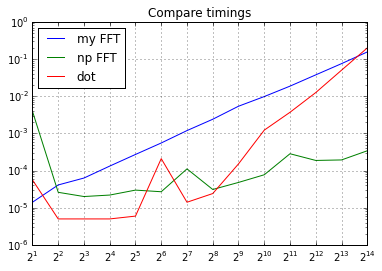

In [2]:
import numpy as np

def FFT(x):
    N = x.shape[0]
    if N == 2: 
        return np.array([x[0]+x[1],x[0]-x[1]])
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        w = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + w[:N / 2] * X_odd,
                               X_even + w[N / 2:] * X_odd])
    
    
import time as t
import scipy as sp
import scipy.linalg
import pylab as pl
%matplotlib inline

myFFT_time_array=[]
npFFT_time_array=[]
dot_time_array=[]
n_array=[2**i for i in range(1,15)]
print n_array
for N in n_array:
    x = np.random.randn(N)
    F = sp.linalg.dft(N)
    start_time = t.time()
    FFT(x)
    myFFT_time_array.append(t.time()- start_time)
    start_time = t.time()
    np.fft.fft(x)
    npFFT_time_array.append(t.time()- start_time)
    start_time = t.time() 
    F.dot(x)
    dot_time_array.append(t.time()- start_time)
    
pl.loglog(n_array,myFFT_time_array, basex=2,label='my FFT')
pl.loglog(n_array,npFFT_time_array, basex=2,label='np FFT')
pl.loglog(n_array,dot_time_array, basex=2,label='dot')
pl.grid(True)
pl.title('Compare timings')
pl.legend(loc="best")
pl.show()


# Problem 2 (Strassen algorithm)

* Implement Strassen algorithm. For simplicity consider that n is a power of 2
* Compare your implementation the Strassen algorithm with direct matrix-matrix multiplication using loops and `𝚗p.𝚍𝚘𝚝` function by ploting timings as a function of $n$.

It might be a good idea not to do recursion in the Strassen algorithm to the bottom level. Sometimes only several levels of the recursion are used. This helps to reduce a constant outside $n^3$. 
* Find analytically constant outside $n^3$ after $2$ levels of the Strassen algorithm. Compare it with $2n^3$ in the naive version.



## Result:
M=multiplications
A=additions 

$M^{strass}(n)=7M^{strass}(n/2)$ 

$A^{strass}(n)=7A^{strass}(n/2) + 18(n/2)^2$

for $2$ levels of the Strassen algorithm

$M^{strass}(n)=7M^{strass}(n/2)=49M^{native}(n/4)=49(n/4)^3$ 

$A^{strass}(n)=7A^{strass}(n/2) + 18(n/2)^2=49A^{native}(n/4) + 126(n/4)^2+18(n/2)^2=49(n/4)^3+ 126(n/4)^2+18(n/2)^2$

$Total=49(n/4)^3+49(n/4)^3+ 126(n/4)^2+18(n/2)^2=98(n/4)^3+ 126(n/4)^2+18(n/2)^2=1.53n^3+6.46n^2 => 1.5n^3 <2n^3$

[2, 4, 8, 16, 32, 64, 128]


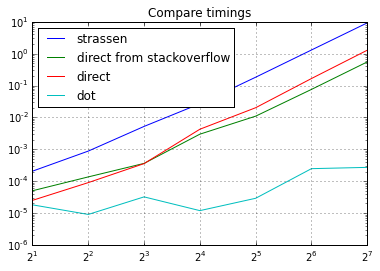

In [3]:
import numpy as np

def split(matrix): 
    a = matrix
    b = matrix
    c = matrix
    d = matrix
    while(len(a) > len(matrix)/2):
        a = a[:len(a)/2]
        b = b[:len(b)/2]
        c = c[len(c)/2:]
        d = d[len(d)/2:]
    while(len(a[0]) > len(matrix[0])/2):
        for i in range(len(a[0])/2):
            a[i] = a[i][:len(a[i])/2]
            b[i] = b[i][len(b[i])/2:]
            c[i] = c[i][:len(c[i])/2]
            d[i] = d[i][len(d[i])/2:]
    return a,b,c,d

def add_m(a, b):
    if type(a) == int:
        d = a + b
    else:
        d = []
        for i in range(len(a)):
            c = []
            for j in range(len(a[0])):
                c.append(a[i][j] + b[i][j])
            d.append(c)
    return d

def sub_m(a, b):
    if type(a) == int:
        d = a - b
    else:
        d = []
        for i in range(len(a)):
            c = []
            for j in range(len(a[0])):
                c.append(a[i][j] - b[i][j])
            d.append(c)
    return d

def strassen(a, b,q):
    if q == 1:
        d = [[0]]
        d[0][0] = a[0][0] * b[0][0]
        return d
    else:
        a11, a12, a21, a22 = split(a)
        b11, b12, b21, b22 = split(b)

        # p1 = (a11+a22) * (b11+b22)
        p1 = strassen(add_m(a11,a22), add_m(b11,b22), q/2)

        # p2 = (a21+a22) * b11
        p2 = strassen(add_m(a21,a22), b11, q/2)

        # p3 = a11 * (b12-b22)
        p3 = strassen(a11, sub_m(b12,b22), q/2)

        # p4 = a22 * (b12-b11)
        p4 = strassen(a22, sub_m(b21,b11), q/2)

        # p5 = (a11+a12) * b22
        p5 = strassen(add_m(a11,a12), b22, q/2)

        # p6 = (a21-a11) * (b11+b12)
        p6 = strassen(sub_m(a21,a11), add_m(b11,b12), q/2)

        # p7 = (a12-a22) * (b21+b22)
        p7 = strassen(sub_m(a12,a22), add_m(b21,b22), q/2)


        # c11 = p1 + p4 - p5 + p7
        c11 = add_m(sub_m(add_m(p1, p4), p5), p7)

        # c12 = p3 + p5
        c12 = add_m(p3, p5)

        # c21 = p2 + p4
        c21 = add_m(p2, p4)

        # c22 = p1 + p3 - p2 + p6
        c22 = add_m(sub_m(add_m(p1, p3), p2), p6)

        c = np.zeros((len(c11)*2,len(c11)*2))
        for i in range(len(c11)):
            for j in range(len(c11)):
                c[i][j]                   = c11[i][j]
                c[i][j+len(c11)]          = c12[i][j]
                c[i+len(c11)][j]          = c21[i][j]
                c[i+len(c11)][j+len(c11)] = c22[i][j]

        return c
    
def stackmult(a,b):
    zip_b = zip(*b)
    return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b)) 
             for col_b in zip_b] for row_a in a]

def directmult(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1] 
    c = np.zeros((n, m))
    for i in range(n): 
        for j in range(m):
            for s in range(k):
                c[i, j] += a[i, s] * b[s, j]

my_time_array=[]
direct_time_array=[]
dot_time_array=[]
stack_time_array=[]
n_array=[2**i for i in range(1,8)]
print n_array
for n in n_array:
    A= np.random.randn(n, n)
    B= np.random.randn(n, n)
    start_time = t.time()
    B.dot(A)
    dot_time_array.append(t.time()- start_time)
    start_time = t.time()
    stackmult(A,B)
    stack_time_array.append(t.time()- start_time)
    start_time = t.time()
    directmult(A,B)
    direct_time_array.append(t.time()- start_time)
    start_time = t.time() 
    A=A.tolist()
    B=B.tolist()
    strassen(A, B, n)
    my_time_array.append(t.time()- start_time)
    
pl.loglog(n_array,my_time_array, basex=2,label='strassen')
pl.loglog(n_array,stack_time_array, basex=2,label='direct from stackoverflow')
pl.loglog(n_array,direct_time_array, basex=2,label='direct')
pl.loglog(n_array,dot_time_array, basex=2,label='dot')
pl.grid(True)
pl.title('Compare timings')
pl.legend(loc="best")
pl.show()

# Problem 3 (Fast convolution)

#### 1D

* Implement fast multiplication of a Toeplitz matrix by a given vector with $\mathcal{O}(n \log n)$ complexity. Make sure that you do not form the Toeplitz matrix itself!

* Now you are able to implement Problem 1 from the Problem Set 1 without truncating the signal. Convolve your signal with the filter $T$ using your fast multiplication algorithm (set $\alpha=\frac{1}{20}$). Play the signal.

#### 2D

* Find convolution of the Lena $n\times n$ image and the following filter
$$
T_{i_1j_1i_2j_2} \equiv T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi} e^{-\alpha \left[(i_1 - j_1)^2 + (i_2 - j_2)^2 \right]}, \quad i_1,j_1, i_2, j_2 = 1,\dots, n, \quad \alpha = \frac{1}{50}
$$
with $\mathcal{O}(n^2 \log n^2)$ complexity. Plot the resulting image (`plt.imshow` might be helpful for this task). What is the complexity of naive summation?

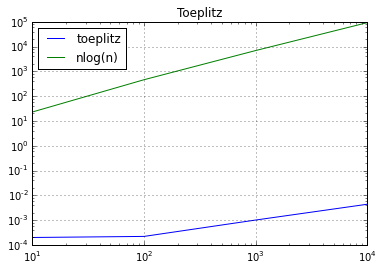

In [4]:
from scipy.linalg import circulant
import time
import scipy as sp
import scipy.linalg
import numpy as np
import pylab as pl

%matplotlib inline


def circulant_matvec(c, x):
    return np.fft.ifft(np.fft.fft(c) * np.fft.fft(x))

from scipy.linalg import toeplitz

def make_circulant(row,column, x):
    size=len(row)
    line=np.append(column, row[1:size][::-1])
    return line, np.append(x, np.zeros(size-1))


#%lprun -f make_circulant make_circulant(T, x)

my_time=[]
n_array=[10**i for i in range(1,5)]
nlogn_time=[i*np.log(i) for i in n_array]
for N in n_array:
    x = np.random.random(N)
    row = np.random.random(N)
    column = np.random.random(N)
    start_time = time.time()
    line, x = make_circulant(row,column, x)
    circulant_matvec(line, x)
    my_time.append(time.time() - start_time)

pl.yscale('log')
pl.xscale('log')
pl.plot(n_array,my_time,label='toeplitz')
pl.plot(n_array,nlogn_time,label='nlog(n)')
pl.title('Toeplitz ')
pl.grid(True)
pl.legend(loc="best")
pl.show()

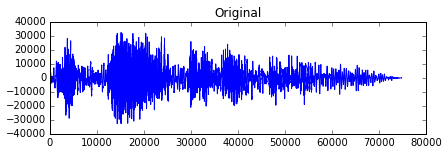

In [5]:
from scipy.io import wavfile
from scipy.signal import resample
import numpy as np
%matplotlib inline
import sys
def load_wav(filename,samplerate=44100):
    
    # load file
    rate, data = wavfile.read(filename)

    # convert stereo to mono
    if len(data.shape) > 1:
        data = data[:,0]/2 + data[:,1]/2

    # re-interpolate samplerate    
    ratio = float(samplerate) / float(rate)
    data = resample(data, len(data) * ratio)
    
    return samplerate, data.astype(np.int16)

#Reading the wavefile
import StringIO
import base64
import struct  

from IPython.core.display import HTML
from IPython.core.display import display
def wavPlayer(data, rate):
    """ will display html 5 player for compatible browser
    The browser need to know how to play wav through html5.
    there is no autoplay to prevent file playing when the browser opens
    Adapted from SciPy.io. and
    github.com/Carreau/posts/blob/master/07-the-sound-of-hydrogen.ipynb
    """
    
    buffer = StringIO.StringIO()
    buffer.write(b'RIFF')
    buffer.write(b'\x00\x00\x00\x00')
    buffer.write(b'WAVE')

    buffer.write(b'fmt ')
    if data.ndim == 1:
        noc = 1
    else:
        noc = data.shape[1]
    bits = data.dtype.itemsize * 8
    sbytes = rate*(bits // 8)*noc
    ba = noc * (bits // 8)
    buffer.write(struct.pack('<ihHIIHH', 16, 1, noc, rate, sbytes, ba, bits))

    # data chunk
    buffer.write(b'data')
    buffer.write(struct.pack('<i', data.nbytes))

    if data.dtype.byteorder == '>' or (data.dtype.byteorder == '=' and sys.byteorder == 'big'):
        data = data.byteswap()

    buffer.write(data.tostring())
    # return buffer.getvalue()
    # Determine file size and place it in correct
    # position at start of the file.
    size = buffer.tell()
    buffer.seek(4)
    buffer.write(struct.pack('<i', size-8))
    
    val = buffer.getvalue()
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source controls src="data:audio/wav;base64,{base64}" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """.format(base64=base64.encodestring(val))
    display(HTML(src))

#The first sound
import pylab as pl
# load
fs1,s1 = load_wav('tbawht02.wav') # Terran Battlecruiser - "Good day, commander."
# plot
pl.figure(figsize=(6.75,2))
pl.plot(s1)
pl.title('Original')
pl.show()

# player
wavPlayer(s1, fs1)

/Users/Toma/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: ComplexWarning: Casting complex values to real discards the imaginary part


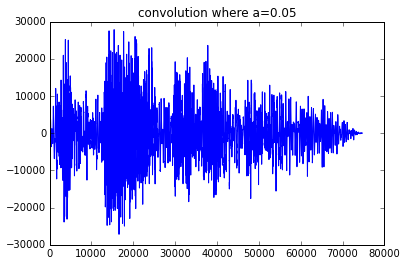

In [6]:
def formula(i,a):
    c=np.sqrt(a/np.pi)
    return c*np.exp(-a*i**2)

size=len(s1)
T_row=np.arange(size)
T_row=formula(T_row,0.05)
line, x = make_circulant(T_row,T_row, s1)
res=circulant_matvec(line, x)
res=res.astype(np.int16)
pl.plot(res[0:size])
pl.title('convolution where a=0.05')
pl.show()
wavPlayer(res[0:size], fs1)

## Complexity of naive summation  - $ 2n^3$

/Users/Toma/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


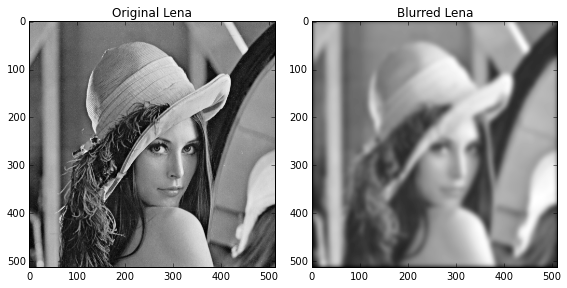

In [7]:

# Blurring and Sharpening the Lena by convolution

from scipy import signal
from scipy import misc

lena = misc.lena()

filter_size = 512
i = np.append(np.arange(filter_size),np.arange(-1*(filter_size-1), 0))
j = np.append(np.arange(filter_size),np.arange(-1*(filter_size-1), 0))
i, j = np.meshgrid(i, j)
a=0.02
T=(a/np.pi)*np.exp(-a*(i**2+j**2))
#print i, j

def expandX(x,N):
    #n=len(x)
    #x= np.vstack([x,np.zeros((N-n,n))])
    #x=np.column_stack([x,np.zeros((N,N-n))])
    n = x.shape[0]
    result = np.zeros((N, N))
    result[:n, :n] = x
    return result

def multilevel_matvec(x,T):
    N=len(T)
    x=expandX(x,N)
    return np.fft.ifft2(np.fft.fft2(T )* np.fft.fft2(x))
             
            
blurred=multilevel_matvec(lena,T)
blurred=blurred.astype(np.float)
fig, ax = pl.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(lena, cmap='gray')
ax[0].set_title('Original Lena')
ax[1].imshow(blurred[:512,:512], cmap='gray')
ax[1].set_title('Blurred Lena')
fig.tight_layout()

# Problem 4 (SVD intro)

* Find SVD decomposition of the Lena image and plot its singular values.
* Compress the image using trunction of singular values. Plot compressed images for several $r$ ($r$ is a number of remaining singular values). Specify in titles of images compression rate. **Note:** do not forget to use `plt.subplots`.

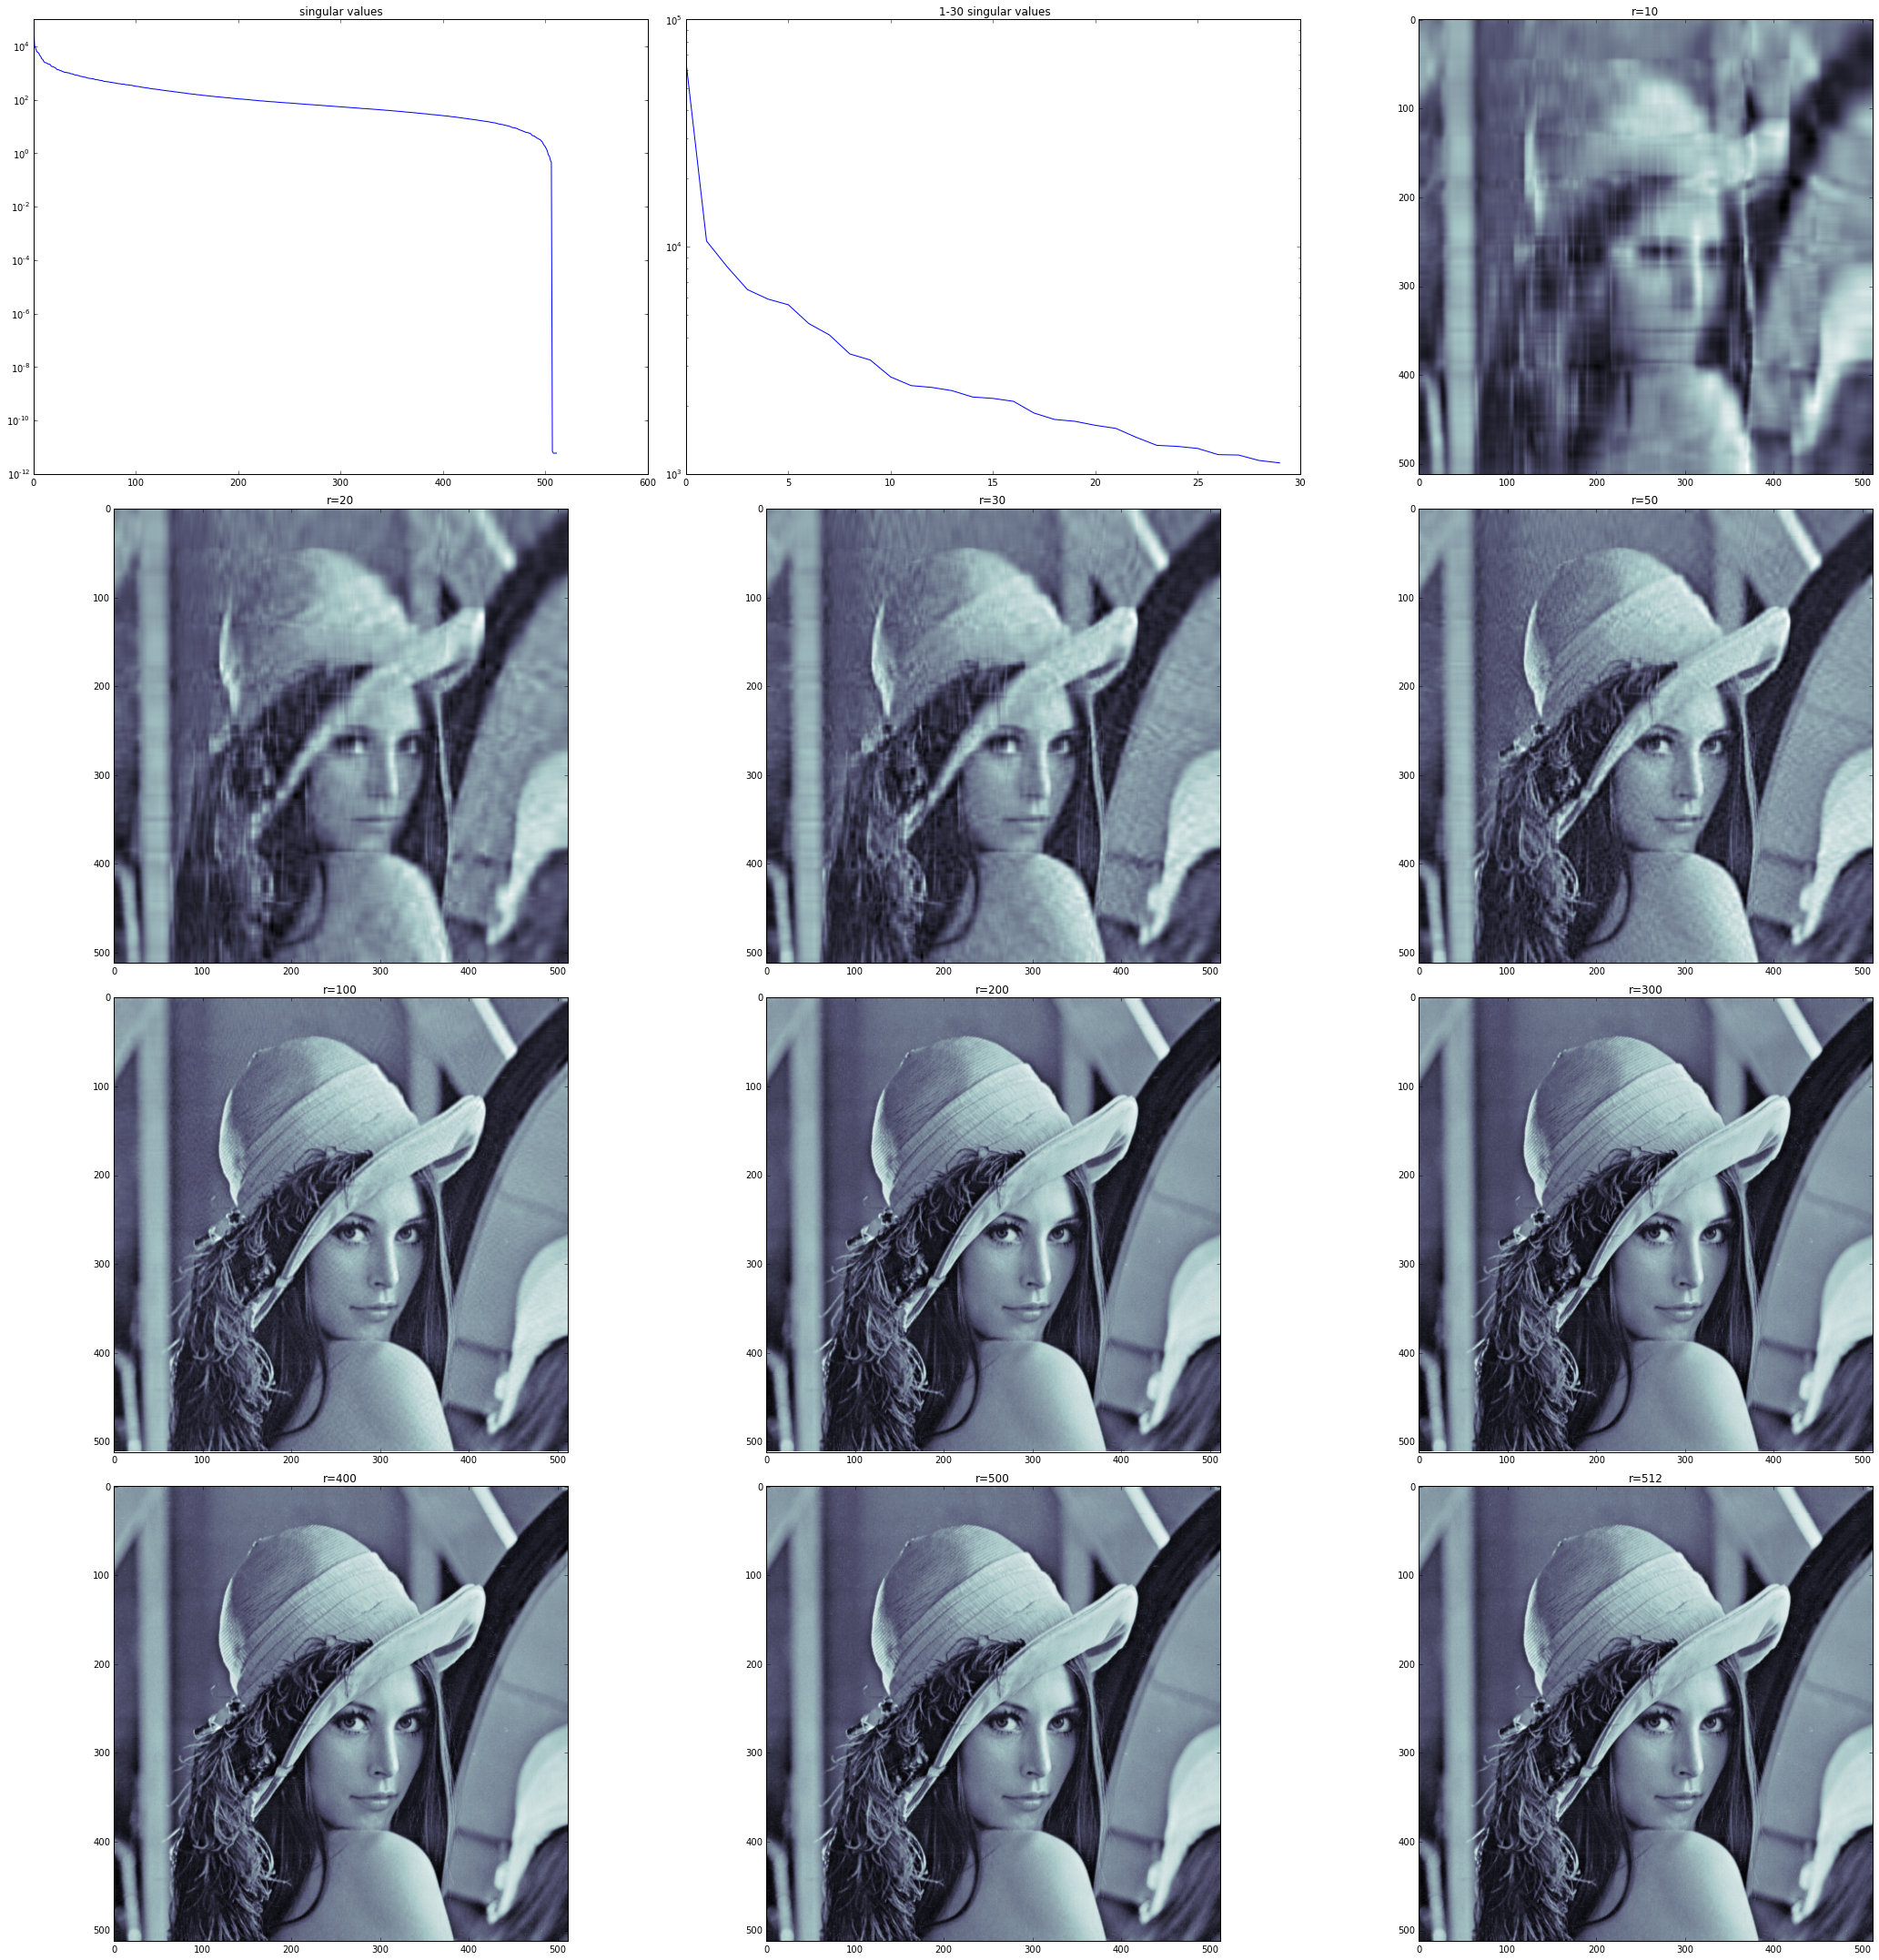

In [8]:
u, s, v = np.linalg.svd(lena)
ranglist = [10,20,30,50,100,200,300,400,500,512]
lines=len(ranglist)
fig, ax = pl.subplots(4, 3, figsize=(30, 30))
ax[0][0].semilogy(s)
ax[0][0].set_title('singular values')
ax[0][1].semilogy(s[:30])
ax[0][1].set_title(' 1-30 singular values')
i=0
j=2
for r in (ranglist):
    Ur = u[:,0:r]
    Vr = v[0:r,:]
    sr = np.diag(s[0:r])
    B = Ur.dot(sr).dot(Vr)
    ax[i][j].imshow(B, cmap = 'bone')
    ax[i][j].set_title('r=%d' % r)
    j+=1
    if(j==3):
        j=0
        i+=1
    
fig.tight_layout()


# Bonus Problem (HOSVD)

Implement High-Order SVD (HOSVD) algorithm in 3D. As an output give ranks of the 3D Hilbert tensor
$$
a_{ijk} = \frac{1}{i+j+k + 1}, \quad i,j,k = 0,\dots, 199
$$
with $10^{-5}$ accuracy. Details can be found [here](http://ca.sandia.gov/~tgkolda/pubs/pubfiles/TensorReview.pdf) on Figure 4.3.

In [3]:
import numpy as np

ni=nj=nk=n=199
i,j,k = np.meshgrid(np.arange(ni), np.arange(nj), np.arange(nk))
A = 1.0/(i + j + k + 1)
A = A.transpose((1,0,2))

A_mode1=np.zeros((ni, nj*nk))
i=0
for j in range(nj):
    for k in range(nk):
        A_mode1[:, i]=A[:,j,k]
        i+=1

A_mode2=np.zeros((nj, ni*nk))
j=0
for i in range(ni):
    for k in range(nk):
        A_mode2[:,j]=A[i,:,k]
        j+=1

A_mode3=np.zeros((nk,ni*nj))
k=0
for i in range(ni):
    for j in range(nj):
        A_mode3[:,k]=A[i,j,:]
        k+=1

print np.linalg.norm(A_mode1 - A.reshape((ni, -1)))
    
#A_mode2=np.concatenate(A, axis=1)
#A_mode3=np.concatenate(A).T

r1=np.linalg.matrix_rank(A_mode1)
r2=np.linalg.matrix_rank(A_mode2)
r3=np.linalg.matrix_rank(A_mode3)

u1, s1, v1 = np.linalg.svd(A_mode1, False)
u2, s2, v2 = np.linalg.svd(A_mode2, False)
u3, s3, v3 = np.linalg.svd(A_mode3, False)


g=np.tensordot(u1[:, :r1].T, A,  axes=[[1], [0]])
g=np.tensordot(u2[:, :r2].T, g, axes=[[1], [1]])
g=np.tensordot(u3[:, :r3].T,g, axes=[[1], [2]])

X=np.tensordot(u3[:, :r3],g,axes=[[1],[0]])
X=np.tensordot(u2[:, :r2],X,axes=[[1],[1]])
X=np.tensordot(u1[:, :r1],X,axes=[[1],[2]])

u, s, v = np.linalg.svd( X - A, False)
print '2-norm (largest sing. value)=',s[0,0]

0.0
2-norm (largest sing. value)= 2.99562556449e-11
